In [13]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [14]:
def load_data():
    # Implement your data loading logic here
    # Return X and y as numpy arrays
    pass

# Fetch data using yfinance
google = yf.Ticker("GOOG")
df = google.history(period='1d', interval="1m")
df = df[['Low']]


In [15]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)

In [16]:
# Split the data into train and test sets
offset = int(0.10 * len(df))
X = np.arange(len(df))
y = df['Low'].values
X_train = X[:-offset]
y_train = y[:-offset]
X_test = X[-offset:]
y_test = y[-offset:]

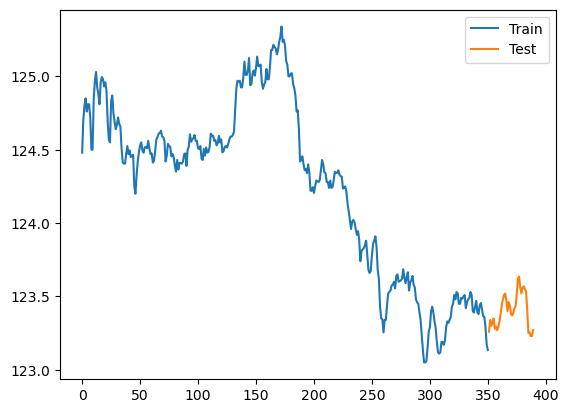

In [17]:
#  Plot the data
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.legend()
plt.show()

In [18]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train.reshape(-1, 1), y_train)

# Evaluate the model
score = model.score(X_test.reshape(-1, 1), y_test)
print("Model score:", score)

Model score: -0.6435472817536798


In [20]:
#  Print data for analysis
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')

# Predict for time 1
forecast = model.predict(X_test.reshape(-1, 1))[0]
print(f'Pred data for time 1: {forecast}')


Real data for time 0: 123.13500213623047
Real data for time 1: 123.26000213623047
Pred data for time 1: 123.4375350686346
